In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [3]:
dt = pd.read_excel(r'Data_Train.xlsx')
dt2 = pd.read_excel(r'Data_Test.xlsx')
df=dt

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
dt.shape

(6019, 12)

In [6]:
# df.isnull().sum().sum() 
df=df.drop_duplicates(keep='first')


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [8]:
temp=df.loc[df['Power']=="null bhp"]

In [9]:
data=df.drop(temp.index)
data['Brand']=data.Name.str.split(" ").str[0]
data['Model']=data.Name.str.split(" ").str[1]
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti,Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Hyundai,Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra,Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti,Wagon


In [10]:
data.isnull().sum().sum()
#dropping 112 rows

112

In [11]:
data.dropna(inplace=True)

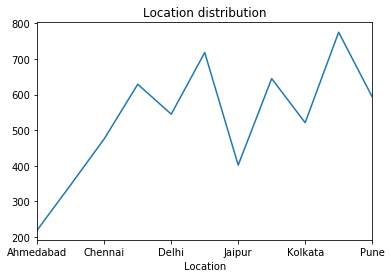

In [12]:
location_dist = data.groupby('Location').size()
location_dist.plot(title='Location distribution')
#ahmendabad = min

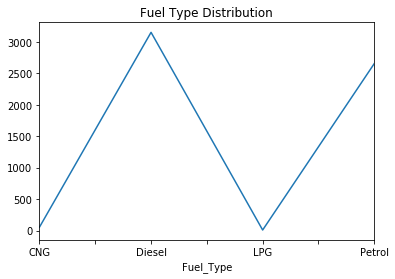

In [13]:
Fuel_dist=data.groupby('Fuel_Type').size()
Fuel_dist.plot(title='Fuel Type Distribution')

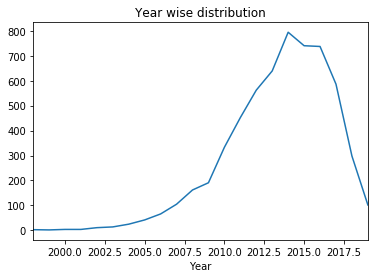

In [14]:
year_dist = data.groupby('Year').size()

year_dist.plot(title='Year wise distribution')

In [15]:
#changing colunms such that these can be made into numbers
data['Engine'] = data['Engine'].str.replace(' CC', '')
data['Power'] = data['Power'].str.replace(' bhp', '')
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '')
data['Mileage'] = data['Mileage'].str.replace(' km/kg', '')
#changing them from string to float/integer

data['Engine']=data['Engine'].astype(float)
data['Power']=data['Power'].astype(float)
data['Mileage']=data['Mileage'].astype(float)

In [16]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


In [17]:
data_num=data.select_dtypes(include=['float64','int64'])
data_num

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90
6017,2013,46000,18.90,998.0,67.10,5.0,2.65


In [18]:
#correlation
data_corr=data_num.corr()['Price'][:-1]

In [19]:
data_corr
#strong positive correlation between Power and price i.e inc. in power == inc. in price

Year                 0.299475
Kilometers_Driven   -0.008249
Mileage             -0.341652
Engine               0.658047
Power                0.772843
Seats                0.055547
Name: Price, dtype: float64

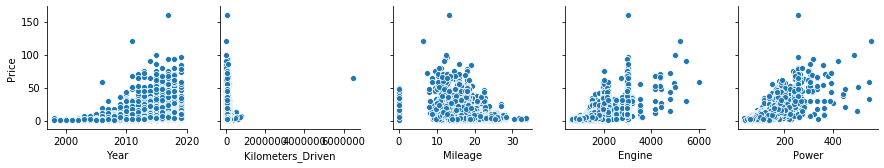

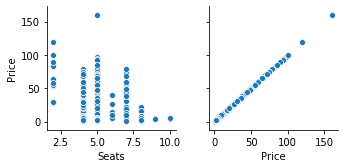

In [20]:
for i in range(0,len(data_num.columns),5):
    sns.pairplot(data_num,y_vars=['Price'],x_vars=data_num.columns[i:i+5])

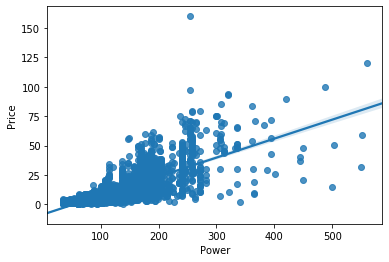

In [21]:
sns.regplot(data['Power'],data['Price'])

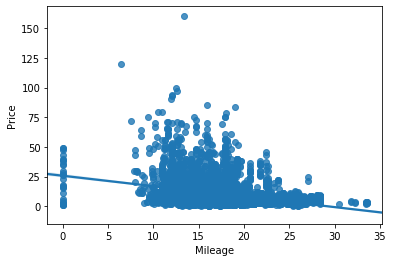

In [22]:
sns.regplot(data['Mileage'],data['Price'])

#  Model

In [23]:
#removing outliers
col=['Year','Mileage','Engine','Power','Kilometers_Driven','Price']
for i in col:
    Q1 = data['{}'.format(i)].quantile(0.25)
    Q3 = data['{}'.format(i)].quantile(0.75)
    IQR = Q3 - Q1
    m1=Q1 - (1.5 * IQR)
    m2=Q3 + (1.5 * IQR)
    k2=data.loc[data['{}'.format(i)]>=m2, '{}'.format(i)].median()
    k1=data.loc[data['{}'.format(i)]<=m1, '{}'.format(i)].median()
    data.loc[data['{}'.format(i)]>=m2, '{}'.format(i)]=k2
    data.loc[data['{}'.format(i)]<=m1, '{}'.format(i)]=k1

In [24]:
le=LabelEncoder()

data['Brand']=le.fit_transform(data['Brand']).astype(float)
data['Location']=le.fit_transform(data['Location']).astype(float)
data['Fuel_Type']=le.fit_transform(data['Fuel_Type']).astype(float)
data['Transmission']=le.fit_transform(data['Transmission']).astype(float)
data['Owner_Type']=le.fit_transform(data['Owner_Type']).astype(float)
data['Model']=le.fit_transform(data['Model']).astype(float)
data['Engine']=data['Engine'].astype(float)
data['Power']=data['Power'].astype(float)
data.drop(columns=['Name'],inplace=True)

In [25]:
y=data["Price"]
data.drop(columns=["Price"],inplace=True)
rbst=RobustScaler()
data=pd.DataFrame(rbst.fit_transform(data))

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.3)

Trying different Models

0.7682793726871131
linreg accuracy
0.7753404494451993


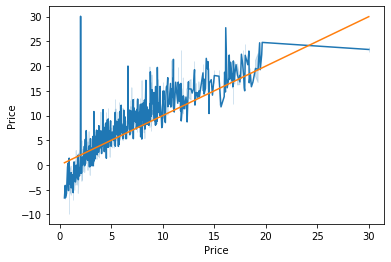

In [27]:

linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
pred=linreg.predict(xtest)
print(r2_score(ytest,pred))
print('linreg accuracy')
s1=cross_val_score(linreg,xtrain,ytrain,cv=12)
print(s1.mean())
p1=sns.lineplot(ytest,pred)
p1=sns.lineplot(ytest,ytest)


0.8921197264340353
knn accuracy
0.8955193672116235


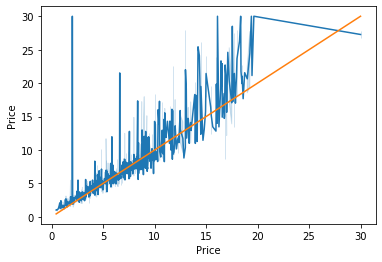

In [28]:
model=KNeighborsRegressor(7,p=1);
model.fit(xtrain,ytrain);
knn=model.predict(xtest)
print(r2_score(ytest,knn))
print('knn accuracy')
s2=cross_val_score(model,xtrain,ytrain,cv=12)
print(s2.mean())
p2=sns.lineplot(ytest,knn)
p2=sns.lineplot(ytest,ytest)

C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8887750528176155
svr accuracy


C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

0.8975128969602124


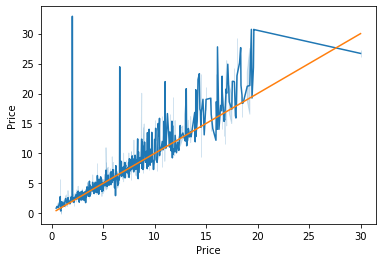

In [29]:
sup=SVR(C=100)
svr=sup.fit(xtrain,ytrain).predict(xtest)
print(r2_score(ytest,svr))
print('svr accuracy')
s3=cross_val_score(sup,xtrain,ytrain,cv=10)
print(s3.mean())
p3=sns.lineplot(ytest,svr)
p3=sns.lineplot(ytest,ytest)

0.8307615520473587
dtr accuracy
0.8257316532925533


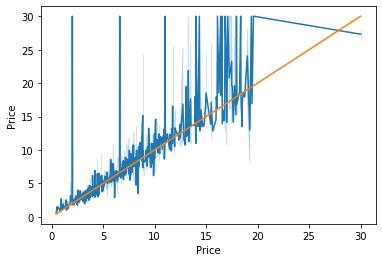

In [30]:
dtree = DecisionTreeRegressor()
dtr=dtree.fit(xtrain, ytrain).predict(xtest)
print(r2_score(ytest,dtr))
print('dtr accuracy')
s4=cross_val_score(dtree,xtrain,ytrain,cv=10)
print(s4.mean())
p4=sns.lineplot(ytest,dtr)
p4=sns.lineplot(ytest,ytest)

C:\Users\Meghaa\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.9212340884462052
xgb accuracy


C:\Users\Meghaa\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Meghaa\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Meghaa\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Meghaa\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Meghaa\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Meghaa

0.9157563053543066


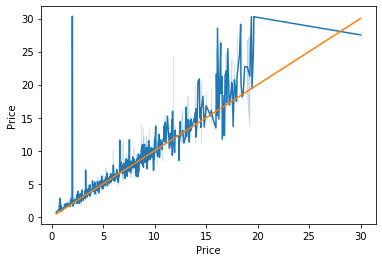

In [31]:
xgb_model=xgb.XGBRegressor(objective='reg:linear',max_depth=8,random_state=42,silent=True)
xgb_pred=xgb_model.fit(xtrain,ytrain).predict(xtest)
print(r2_score(ytest,xgb_pred))
print('xgb accuracy')
s5=cross_val_score(xgb_model,xtrain,ytrain,cv=10)
print(s5.mean())

p5=sns.lineplot(ytest,xgb_pred)
p5=sns.lineplot(ytest,ytest)